In [2]:
import numpy as np
import h5py
import torch
import os
import matplotlib.pyplot as plt

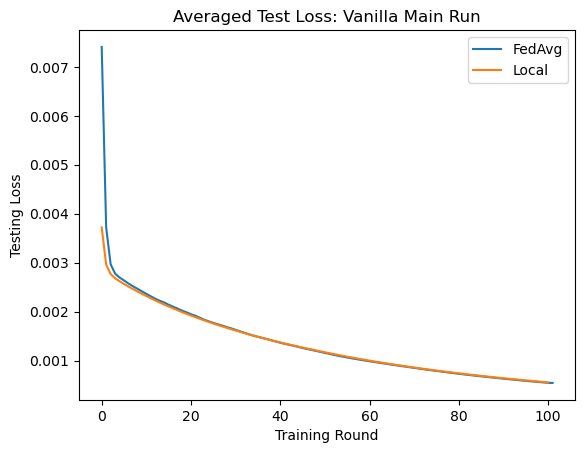

In [3]:
general_results_path = r"C:\Users\kdmen\Desktop\Research\personalization-privacy-risk\Personalized_Federated_Learning\results"
fedavg_filename = "cphs_FedAvg_test.h5"
local_filename = "cphs_Local_test.h5"

directory_str = "09-09_18-04_vanilla_validation_run"
h5_path = os.path.join(general_results_path, directory_str, fedavg_filename)
with h5py.File(h5_path, 'r') as f:
    a_group_key = list(f.keys())[0]
    fedavg_val_train_loss = f['rs_train_loss'][()]
    fedavg_val_test_loss = f['rs_test_loss'][()]

directory_str = "09-09_18-13_vanilla_validation_local"
h5_path = os.path.join(general_results_path, directory_str, local_filename)
with h5py.File(h5_path, 'r') as f:
    a_group_key = list(f.keys())[0]
    local_val_train_loss = f['rs_train_loss'][()]
    local_val_test_loss = f['rs_test_loss'][()]
    
plt.plot(range(len(fedavg_val_test_loss)), fedavg_val_test_loss, label="FedAvg")
plt.plot(range(len(local_val_test_loss)), local_val_test_loss, label="Local")
plt.title("Averaged Test Loss: Vanilla Main Run")
plt.xlabel("Training Round")
plt.ylabel("Testing Loss")
plt.legend()
plt.show()

# All Conditions Testing

## Testing One Subject, All Conditions
> Does local now outperform global? This is the case where it clearly should (or at least have a chance)

In [2]:
general_results_path = r"C:\Users\kdmen\Desktop\Research\personalization-privacy-risk\Personalized_Federated_Learning\results"
fedavg_filename = "cphs_FedAvg_test.h5"
local_filename = "cphs_Local_test.h5"

#"09-08_21-43_FedAvg100_S106a_AllConds"
#"09-08_22-36_FedAvg100_S106a_AllConds"
#"09-08_22-40_Local100_S106a_AllConds"

directory_str = "09-08_21-43_FedAvg100_S106a_AllConds"
h5_path = os.path.join(general_results_path, directory_str, fedavg_filename)
with h5py.File(h5_path, 'r') as f:
    a_group_key = list(f.keys())[0]
    fedavg106a_train_loss = f['rs_train_loss'][()]
    fedavg106a_test_loss = f['rs_test_loss'][()]
    
directory_str = "09-08_22-36_FedAvg100_S106a_AllConds"
h5_path = os.path.join(general_results_path, directory_str, fedavg_filename)
with h5py.File(h5_path, 'r') as f:
    a_group_key = list(f.keys())[0]
    fedavg106b_train_loss = f['rs_train_loss'][()]
    fedavg106b_test_loss = f['rs_test_loss'][()]
    
# BASELINE COMPARISON
directory_str = "09-08_22-40_Local100_S106a_AllConds"
h5_path = os.path.join(general_results_path, directory_str, local_filename)
with h5py.File(h5_path, 'r') as f:
    a_group_key = list(f.keys())[0]
    local106a_train_loss = f['rs_train_loss'][()]
    local106a_test_loss = f['rs_test_loss'][()]

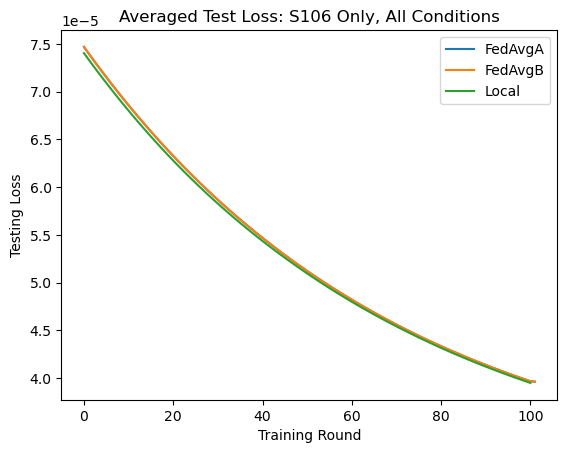

In [3]:
plt.plot(range(len(fedavg106a_test_loss)), fedavg106a_test_loss, label="FedAvgA")
plt.plot(range(len(fedavg106b_test_loss)), fedavg106b_test_loss, label="FedAvgB")
plt.plot(range(len(local106a_test_loss)), local106a_test_loss, label="Local")

plt.title("Averaged Test Loss: S106 Only, All Conditions")
plt.xlabel("Training Round")
plt.ylabel("Testing Loss")
plt.legend()
plt.show()

## Cluster-Based Testing
> Subjs 108, 110, 115, 116, and 118 were found to be the closest group of that size (eg there were other pairs too) with the min stat hetero between them based on the dendrogram. Thus in this case, FedAvg should do great and Local should be outperformed.

In [4]:
#"09-08_22-57_FedAvg100_S108_S110_S115_S116_S118_AllConds"
#"09-08_23-10_Local100_S108_S110_S115_S116_S118_AllConds"

directory_str = "09-08_22-57_FedAvg100_S108_S110_S115_S116_S118_AllConds"
h5_path = os.path.join(general_results_path, directory_str, fedavg_filename)
with h5py.File(h5_path, 'r') as f:
    a_group_key = list(f.keys())[0]
    fedavg_clus_train_loss = f['rs_train_loss'][()]
    fedavg_clus_test_loss = f['rs_test_loss'][()]
    
# BASELINE COMPARISON
directory_str = "09-08_23-10_Local100_S108_S110_S115_S116_S118_AllConds"
h5_path = os.path.join(general_results_path, directory_str, local_filename)
with h5py.File(h5_path, 'r') as f:
    a_group_key = list(f.keys())[0]
    local_clus_train_loss = f['rs_train_loss'][()]
    local_clus_test_loss = f['rs_test_loss'][()]

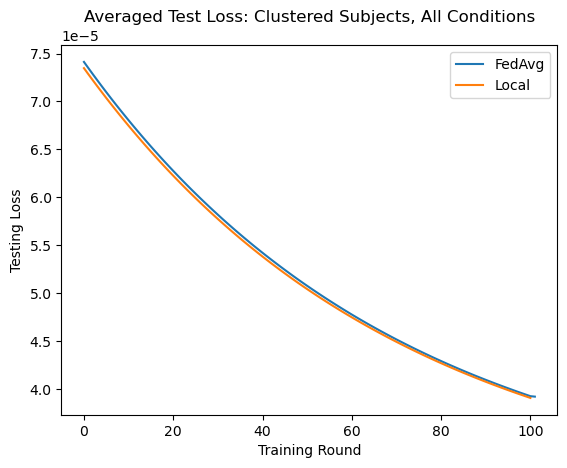

In [5]:
plt.plot(range(len(fedavg_clus_test_loss)), fedavg_clus_test_loss, label="FedAvg")
plt.plot(range(len(local_clus_test_loss)), local_clus_test_loss, label="Local")

plt.title("Averaged Test Loss: Clustered Subjects, All Conditions")
plt.xlabel("Training Round")
plt.ylabel("Testing Loss")
plt.legend()
plt.show()

## Testing All Subjects, All Conditions! Max Data!

In [6]:
directory_str = "09-09_00-13_FedAvg100_AllSubjs_AllConds"
h5_path = os.path.join(general_results_path, directory_str, fedavg_filename)
with h5py.File(h5_path, 'r') as f:
    a_group_key = list(f.keys())[0]
    fedavg_ALL_train_loss = f['rs_train_loss'][()]
    fedavg_ALL_test_loss = f['rs_test_loss'][()]

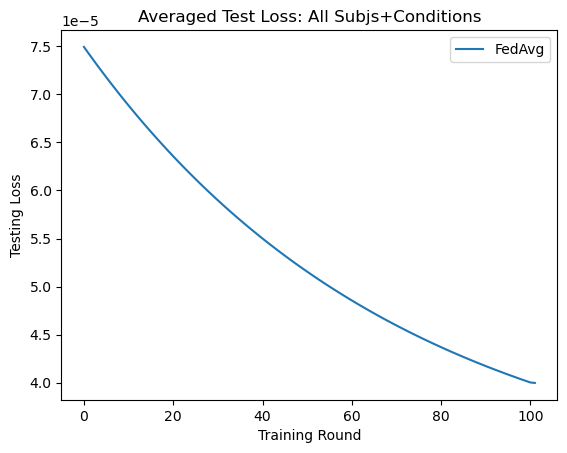

In [8]:
plt.plot(range(len(fedavg_ALL_test_loss)), fedavg_ALL_test_loss, label="FedAvg")

plt.title("Averaged Test Loss: All Subjs+Conditions")
plt.xlabel("Training Round")
plt.ylabel("Testing Loss")
plt.legend()
plt.show()

# Bias True/False
> Bias False was the default for this run, so runs where the bias was set to True are delineated with "B: " as a prefix in the legend

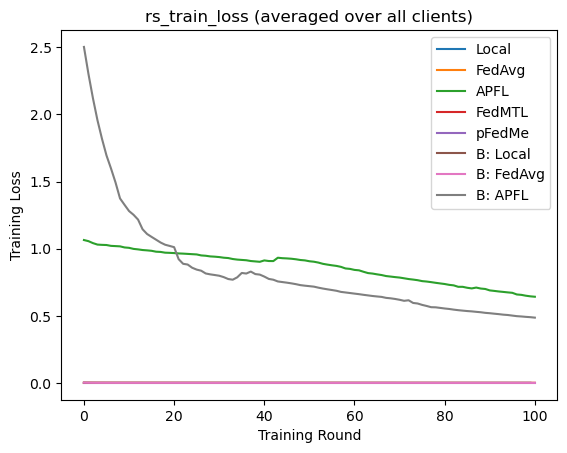

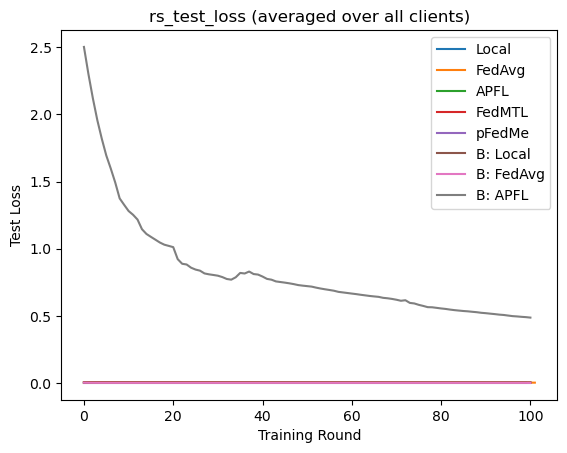

In [9]:
# LOCAL
h5_path = r"C:\Users\kdmen\Desktop\Research\personalization-privacy-risk\Personalized_Federated_Learning\results\early_results\08-09_10-12_Local100"
h5_file_name = r"cphs_Local_test.h5"
with h5py.File(os.path.join(h5_path, h5_file_name), 'r') as f:
    a_group_key = list(f.keys())[0]
    client_list = list(f[a_group_key])
    group = f[a_group_key]
    rs_train_loss_GROUP = f['rs_train_loss']
    local100_train_loss = rs_train_loss_GROUP[()]
    rs_test_loss_GROUP = f['rs_test_loss']
    local100_test_loss = rs_test_loss_GROUP[()]

# FEDVG
h5_path = r"C:\Users\kdmen\Desktop\Research\personalization-privacy-risk\Personalized_Federated_Learning\results\early_results\08-09_11-06_FedAvg100"
h5_file_name = r"cphs_FedAvg_test.h5"
with h5py.File(os.path.join(h5_path, h5_file_name), 'r') as f:
    a_group_key = list(f.keys())[0]
    client_list = list(f[a_group_key])
    group = f[a_group_key]
    rs_train_loss_GROUP = f['rs_train_loss']
    fedavg100_train_loss = rs_train_loss_GROUP[()]
    rs_test_loss_GROUP = f['rs_test_loss']
    fedavg100_test_loss = rs_test_loss_GROUP[()]
    
# APFL
h5_path = r"C:\Users\kdmen\Desktop\Research\personalization-privacy-risk\Personalized_Federated_Learning\results\early_results\08-09_15-08_APFL100"
h5_file_name = r"cphs_APFL_test.h5"
with h5py.File(os.path.join(h5_path, h5_file_name), 'r') as f:
    a_group_key = list(f.keys())[0]
    client_list = list(f[a_group_key])
    group = f[a_group_key]
    rs_train_loss_GROUP = f['rs_train_loss']
    apfl100_train_loss = rs_train_loss_GROUP[()]
    rs_test_loss_GROUP = f['rs_test_loss']
    apfl100_test_loss = rs_test_loss_GROUP[()]
    
# FEDMTL
h5_path = r"C:\Users\kdmen\Desktop\Research\personalization-privacy-risk\Personalized_Federated_Learning\results\early_results\08-10_21-03_FedMTL100"
h5_file_name = r"cphs_FedMTL_test.h5"
with h5py.File(os.path.join(h5_path, h5_file_name), 'r') as f:
    a_group_key = list(f.keys())[0]
    client_list = list(f[a_group_key])
    group = f[a_group_key]
    rs_train_loss_GROUP = f['rs_train_loss']
    fedmtl100_train_loss = rs_train_loss_GROUP[()]
    rs_test_loss_GROUP = f['rs_test_loss']
    fedmtl100_test_loss = rs_test_loss_GROUP[()]

# PFEDME
h5_path = r"C:\Users\kdmen\Desktop\Research\personalization-privacy-risk\Personalized_Federated_Learning\results\early_results\08-10_20-54_pFedMe100"
h5_file_name = r"cphs_pFedMe_test.h5"
with h5py.File(os.path.join(h5_path, h5_file_name), 'r') as f:
    a_group_key = list(f.keys())[0]
    client_list = list(f[a_group_key])
    group = f[a_group_key]
    #print(group)
    rs_train_loss_GROUP = f['rs_train_loss_per']
    pfedme100_train_loss = rs_train_loss_GROUP[()]
    rs_test_loss_GROUP = f['rs_test_loss_per']
    pfedme100_test_loss = rs_test_loss_GROUP[()]
    
######################################################
# LOCAL
h5_path = r"C:\Users\kdmen\Desktop\Research\personalization-privacy-risk\Personalized_Federated_Learning\results\early_results\08-12_23-27_Local100_PCA10_JRp3_BiasTrue"
h5_file_name = r"cphs_Local_test.h5"
with h5py.File(os.path.join(h5_path, h5_file_name), 'r') as f:
    a_group_key = list(f.keys())[0]
    client_list = list(f[a_group_key])
    group = f[a_group_key]
    rs_train_loss_GROUP = f['rs_train_loss']
    Blocal100_train_loss = rs_train_loss_GROUP[()]
    rs_test_loss_GROUP = f['rs_test_loss']
    Blocal100_test_loss = rs_test_loss_GROUP[()]

# FEDVG
h5_path = r"C:\Users\kdmen\Desktop\Research\personalization-privacy-risk\Personalized_Federated_Learning\results\early_results\08-12_23-17_FedAvg100_PCA10_JRp3_BiasTrue"
h5_file_name = r"cphs_FedAvg_test.h5"
with h5py.File(os.path.join(h5_path, h5_file_name), 'r') as f:
    a_group_key = list(f.keys())[0]
    client_list = list(f[a_group_key])
    group = f[a_group_key]
    rs_train_loss_GROUP = f['rs_train_loss']
    Bfedavg100_train_loss = rs_train_loss_GROUP[()]
    rs_test_loss_GROUP = f['rs_test_loss']
    Bfedavg100_test_loss = rs_test_loss_GROUP[()]
    
# APFL
h5_path = r"C:\Users\kdmen\Desktop\Research\personalization-privacy-risk\Personalized_Federated_Learning\results\early_results\08-12_23-38_APFL100_PCA10_JRp3_BiasTrue"
h5_file_name = r"cphs_APFL_test.h5"
with h5py.File(os.path.join(h5_path, h5_file_name), 'r') as f:
    a_group_key = list(f.keys())[0]
    client_list = list(f[a_group_key])
    group = f[a_group_key]
    rs_train_loss_GROUP = f['rs_train_loss']
    Bapfl100_train_loss = rs_train_loss_GROUP[()]
    rs_test_loss_GROUP = f['rs_test_loss']
    Bapfl100_test_loss = rs_test_loss_GROUP[()]
######################################################   

plt.plot(range(len(local100_train_loss)), local100_train_loss, label='Local')
plt.plot(range(len(fedavg100_train_loss)), fedavg100_train_loss, label='FedAvg')
plt.plot(range(len(apfl100_train_loss)), apfl100_train_loss, label='APFL')
plt.plot(range(len(fedmtl100_train_loss)), fedmtl100_train_loss, label='FedMTL')
plt.plot(range(len(pfedme100_train_loss)), pfedme100_train_loss, label='pFedMe')
plt.plot(range(len(Blocal100_train_loss)), Blocal100_train_loss, label='B: Local')
plt.plot(range(len(Bfedavg100_train_loss)), Bfedavg100_train_loss, label='B: FedAvg')
plt.plot(range(len(Bapfl100_train_loss)), Bapfl100_train_loss, label='B: APFL')
plt.title("rs_train_loss (averaged over all clients)")
plt.xlabel("Training Round")
plt.ylabel("Training Loss")
plt.legend()
plt.show()

plt.plot(range(len(local100_test_loss)), local100_test_loss, label='Local')
plt.plot(range(len(fedavg100_test_loss)), fedavg100_test_loss, label='FedAvg')
plt.plot(range(len(apfl100_test_loss)), apfl100_test_loss, label='APFL')
plt.plot(range(len(fedmtl100_test_loss)), fedmtl100_test_loss, label='FedMTL')
plt.plot(range(len(pfedme100_test_loss)), pfedme100_test_loss, label='pFedMe')
plt.plot(range(len(Blocal100_train_loss)), Blocal100_train_loss, label='B: Local')
plt.plot(range(len(Bfedavg100_train_loss)), Bfedavg100_train_loss, label='B: FedAvg')
plt.plot(range(len(Bapfl100_train_loss)), Bapfl100_train_loss, label='B: APFL')
plt.title("rs_test_loss (averaged over all clients)")
plt.xlabel("Training Round")
plt.ylabel("Test Loss")
plt.legend()
plt.show()

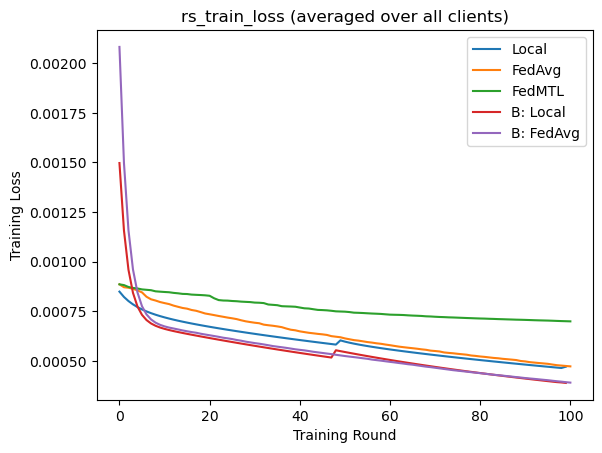

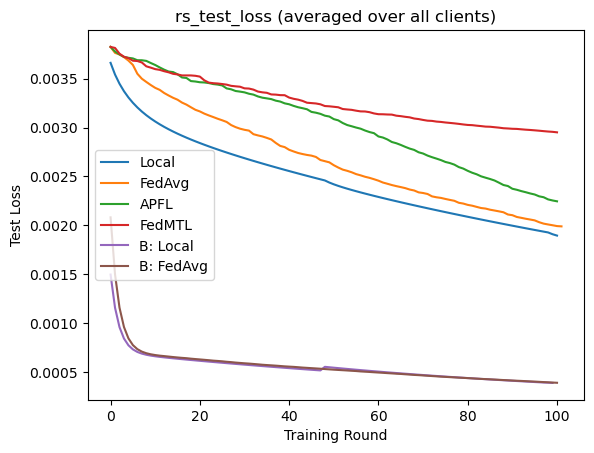

In [4]:
plt.plot(range(len(local100_train_loss)), local100_train_loss, label='Local')
plt.plot(range(len(fedavg100_train_loss)), fedavg100_train_loss, label='FedAvg')
#plt.plot(range(len(apfl100_train_loss)), apfl100_train_loss, label='APFL')
plt.plot(range(len(fedmtl100_train_loss)), fedmtl100_train_loss, label='FedMTL')
#plt.plot(range(len(pfedme100_train_loss)), pfedme100_train_loss, label='pFedMe')
plt.plot(range(len(Blocal100_train_loss)), Blocal100_train_loss, label='B: Local')
plt.plot(range(len(Bfedavg100_train_loss)), Bfedavg100_train_loss, label='B: FedAvg')
#plt.plot(range(len(Bapfl100_train_loss)), Bapfl100_train_loss, label='B: APFL')
plt.title("rs_train_loss (averaged over all clients)")
plt.xlabel("Training Round")
plt.ylabel("Training Loss")
plt.legend()
plt.show()

plt.plot(range(len(local100_test_loss)), local100_test_loss, label='Local')
plt.plot(range(len(fedavg100_test_loss)), fedavg100_test_loss, label='FedAvg')
plt.plot(range(len(apfl100_test_loss)), apfl100_test_loss, label='APFL')
plt.plot(range(len(fedmtl100_test_loss)), fedmtl100_test_loss, label='FedMTL')
#plt.plot(range(len(pfedme100_test_loss)), pfedme100_test_loss, label='pFedMe')
plt.plot(range(len(Blocal100_train_loss)), Blocal100_train_loss, label='B: Local')
plt.plot(range(len(Bfedavg100_train_loss)), Bfedavg100_train_loss, label='B: FedAvg')
#plt.plot(range(len(Bapfl100_train_loss)), Bapfl100_train_loss, label='B: APFL')
plt.title("rs_test_loss (averaged over all clients)")
plt.xlabel("Training Round")
plt.ylabel("Test Loss")
plt.legend()
plt.show()

# Join Ratio
> Default JR is 0.3 (earlier was 0.2). Expectation is that for Local algo, since all clients are trained each round (eg JR is not used) that JR should have no effect

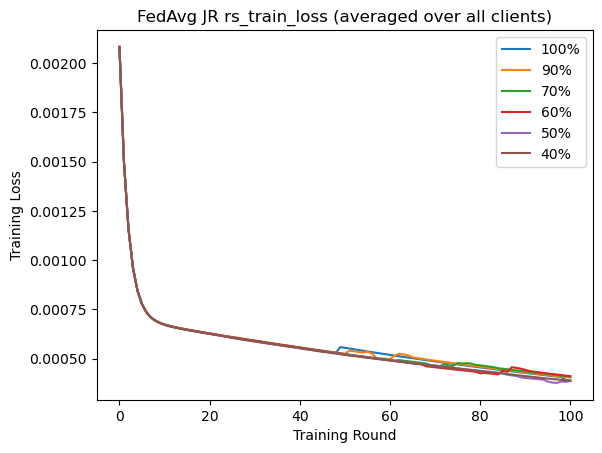

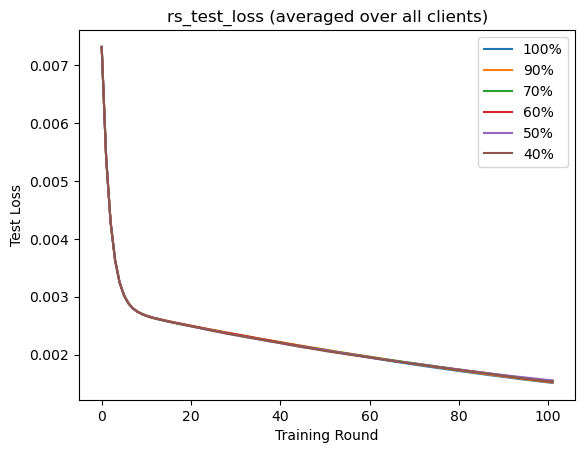

In [3]:
# FedAvg JR=1 (100%)
h5_path = r"C:\Users\kdmen\Desktop\Research\personalization-privacy-risk\Personalized_Federated_Learning\results\08-14_23-05_FedAvg100_JR1"
h5_file_name = r"cphs_FedAvg_test.h5"
with h5py.File(os.path.join(h5_path, h5_file_name), 'r') as f:
    a_group_key = list(f.keys())[0]
    client_list = list(f[a_group_key])
    group = f[a_group_key]
    rs_train_loss_GROUP = f['rs_train_loss']
    fedavg_jr1_train_loss = rs_train_loss_GROUP[()]
    rs_test_loss_GROUP = f['rs_test_loss']
    fedavg_jr1_test_loss = rs_test_loss_GROUP[()]

# FedAvg JR=0.9 (90%)
h5_path = r"C:\Users\kdmen\Desktop\Research\personalization-privacy-risk\Personalized_Federated_Learning\results\08-14_22-59_FedAvg100_JRp9"
h5_file_name = r"cphs_FedAvg_test.h5"
with h5py.File(os.path.join(h5_path, h5_file_name), 'r') as f:
    a_group_key = list(f.keys())[0]
    client_list = list(f[a_group_key])
    group = f[a_group_key]
    rs_train_loss_GROUP = f['rs_train_loss']
    fedavg_jrp9_train_loss = rs_train_loss_GROUP[()]
    rs_test_loss_GROUP = f['rs_test_loss']
    fedavg_jrp9_test_loss = rs_test_loss_GROUP[()]
    
# FedAvg JR=0.7 (70%)
h5_path = r"C:\Users\kdmen\Desktop\Research\personalization-privacy-risk\Personalized_Federated_Learning\results\08-14_22-52_FedAvg100_JRp7"
h5_file_name = r"cphs_FedAvg_test.h5"
with h5py.File(os.path.join(h5_path, h5_file_name), 'r') as f:
    a_group_key = list(f.keys())[0]
    client_list = list(f[a_group_key])
    group = f[a_group_key]
    rs_train_loss_GROUP = f['rs_train_loss']
    fedavg_jrp7_train_loss = rs_train_loss_GROUP[()]
    rs_test_loss_GROUP = f['rs_test_loss']
    fedavg_jrp7_test_loss = rs_test_loss_GROUP[()]
    
# FedAvg JR=0.6 (60%)
h5_path = r"C:\Users\kdmen\Desktop\Research\personalization-privacy-risk\Personalized_Federated_Learning\results\08-14_22-47_FedAvg100_JRp6"
h5_file_name = r"cphs_FedAvg_test.h5"
with h5py.File(os.path.join(h5_path, h5_file_name), 'r') as f:
    a_group_key = list(f.keys())[0]
    client_list = list(f[a_group_key])
    group = f[a_group_key]
    rs_train_loss_GROUP = f['rs_train_loss']
    fedavg_jrp6_train_loss = rs_train_loss_GROUP[()]
    rs_test_loss_GROUP = f['rs_test_loss']
    fedavg_jrp6_test_loss = rs_test_loss_GROUP[()]

# FedAvg JR=0.5 (50%)
h5_path = r"C:\Users\kdmen\Desktop\Research\personalization-privacy-risk\Personalized_Federated_Learning\results\08-14_22-42_FedAvg100_JRp5"
h5_file_name = r"cphs_FedAvg_test.h5"
with h5py.File(os.path.join(h5_path, h5_file_name), 'r') as f:
    a_group_key = list(f.keys())[0]
    client_list = list(f[a_group_key])
    group = f[a_group_key]
    rs_train_loss_GROUP = f['rs_train_loss']
    fedavg_jrp5_train_loss = rs_train_loss_GROUP[()]
    rs_test_loss_GROUP = f['rs_test_loss']
    fedavg_jrp5_test_loss = rs_test_loss_GROUP[()]
    
# FedAvg JR=0.4 (40%)
h5_path = r"C:\Users\kdmen\Desktop\Research\personalization-privacy-risk\Personalized_Federated_Learning\results\08-14_22-37_FedAvg100_JRp4"
h5_file_name = r"cphs_FedAvg_test.h5"
with h5py.File(os.path.join(h5_path, h5_file_name), 'r') as f:
    a_group_key = list(f.keys())[0]
    client_list = list(f[a_group_key])
    group = f[a_group_key]
    rs_train_loss_GROUP = f['rs_train_loss']
    fedavg_jrp4_train_loss = rs_train_loss_GROUP[()]
    rs_test_loss_GROUP = f['rs_test_loss']
    fedavg_jrp4_test_loss = rs_test_loss_GROUP[()]   

plt.plot(range(len(fedavg_jr1_train_loss)), fedavg_jr1_train_loss, label='100%')
plt.plot(range(len(fedavg_jrp9_train_loss)), fedavg_jrp9_train_loss, label='90%')
plt.plot(range(len(fedavg_jrp7_train_loss)), fedavg_jrp7_train_loss, label='70%')
plt.plot(range(len(fedavg_jrp6_train_loss)), fedavg_jrp6_train_loss, label='60%')
plt.plot(range(len(fedavg_jrp5_train_loss)), fedavg_jrp5_train_loss, label='50%')
plt.plot(range(len(fedavg_jrp4_train_loss)), fedavg_jrp4_train_loss, label='40%')
plt.title("FedAvg JR rs_train_loss (averaged over all clients)")
plt.xlabel("Training Round")
plt.ylabel("Training Loss")
plt.legend()
plt.show()

plt.plot(range(len(fedavg_jr1_test_loss)), fedavg_jr1_test_loss, label='100%')
plt.plot(range(len(fedavg_jrp9_test_loss)), fedavg_jrp9_test_loss, label='90%')
plt.plot(range(len(fedavg_jrp7_test_loss)), fedavg_jrp7_test_loss, label='70%')
plt.plot(range(len(fedavg_jrp6_test_loss)), fedavg_jrp6_test_loss, label='60%')
plt.plot(range(len(fedavg_jrp5_test_loss)), fedavg_jrp5_test_loss, label='50%')
plt.plot(range(len(fedavg_jrp4_test_loss)), fedavg_jrp4_test_loss, label='40%')
plt.title("rs_test_loss (averaged over all clients)")
plt.xlabel("Training Round")
plt.ylabel("Test Loss")
plt.legend()
plt.show()

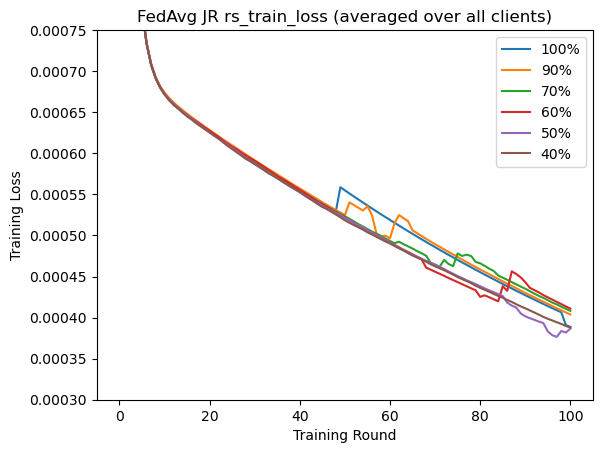

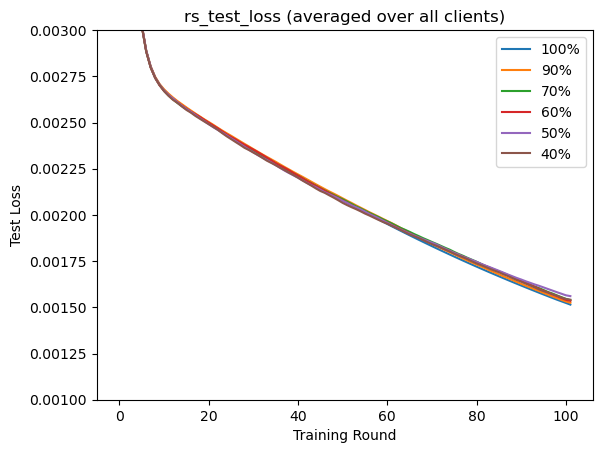

In [7]:
plt.plot(range(len(fedavg_jr1_train_loss)), fedavg_jr1_train_loss, label='100%')
plt.plot(range(len(fedavg_jrp9_train_loss)), fedavg_jrp9_train_loss, label='90%')
plt.plot(range(len(fedavg_jrp7_train_loss)), fedavg_jrp7_train_loss, label='70%')
plt.plot(range(len(fedavg_jrp6_train_loss)), fedavg_jrp6_train_loss, label='60%')
plt.plot(range(len(fedavg_jrp5_train_loss)), fedavg_jrp5_train_loss, label='50%')
plt.plot(range(len(fedavg_jrp4_train_loss)), fedavg_jrp4_train_loss, label='40%')
plt.title("FedAvg JR rs_train_loss (averaged over all clients)")
plt.xlabel("Training Round")
plt.ylabel("Training Loss")
plt.ylim(0.0003, 0.00075)
plt.legend()
plt.show()

plt.plot(range(len(fedavg_jr1_test_loss)), fedavg_jr1_test_loss, label='100%')
plt.plot(range(len(fedavg_jrp9_test_loss)), fedavg_jrp9_test_loss, label='90%')
plt.plot(range(len(fedavg_jrp7_test_loss)), fedavg_jrp7_test_loss, label='70%')
plt.plot(range(len(fedavg_jrp6_test_loss)), fedavg_jrp6_test_loss, label='60%')
plt.plot(range(len(fedavg_jrp5_test_loss)), fedavg_jrp5_test_loss, label='50%')
plt.plot(range(len(fedavg_jrp4_test_loss)), fedavg_jrp4_test_loss, label='40%')
plt.title("rs_test_loss (averaged over all clients)")
plt.xlabel("Training Round")
plt.ylabel("Test Loss")
plt.ylim(0.001, 0.003)
plt.legend()
plt.show()

Join Ratio appears to have essentially no effect at all on testing accuracy. Training accuracy appears to spike harder the mroe clients are involved... maybe because there's a bigger shift between updates? Not sure why that would be...
> Intuively, more clients involved each round should result in a better or at least faster train/test loss... double check that this is working correctly...

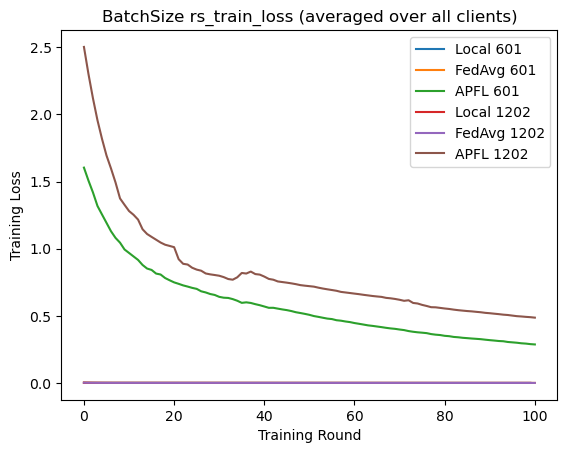

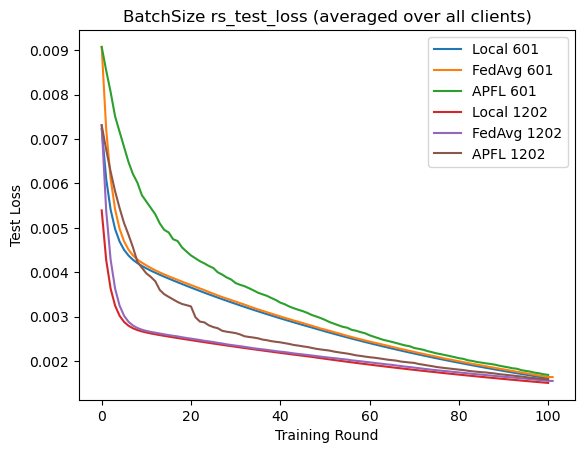

In [10]:
# LOCAL
h5_path = r"C:\Users\kdmen\Desktop\Research\personalization-privacy-risk\Personalized_Federated_Learning\results\08-14_22-05_Local100_BS601"
h5_file_name = r"cphs_Local_test.h5"
with h5py.File(os.path.join(h5_path, h5_file_name), 'r') as f:
    a_group_key = list(f.keys())[0]
    client_list = list(f[a_group_key])
    group = f[a_group_key]
    rs_train_loss_GROUP = f['rs_train_loss']
    local_bs601_train_loss = rs_train_loss_GROUP[()]
    rs_test_loss_GROUP = f['rs_test_loss']
    local_bs601_test_loss = rs_test_loss_GROUP[()]

# FEDVG
h5_path = r"C:\Users\kdmen\Desktop\Research\personalization-privacy-risk\Personalized_Federated_Learning\results\08-14_22-14_FedAvg100_BS601"
h5_file_name = r"cphs_FedAvg_test.h5"
with h5py.File(os.path.join(h5_path, h5_file_name), 'r') as f:
    a_group_key = list(f.keys())[0]
    client_list = list(f[a_group_key])
    group = f[a_group_key]
    rs_train_loss_GROUP = f['rs_train_loss']
    fedavg_bs601_train_loss = rs_train_loss_GROUP[()]
    rs_test_loss_GROUP = f['rs_test_loss']
    fedavg_bs601_test_loss = rs_test_loss_GROUP[()]
    
# APFL
h5_path = r"C:\Users\kdmen\Desktop\Research\personalization-privacy-risk\Personalized_Federated_Learning\results\08-14_22-24_APFL100_BS601"
h5_file_name = r"cphs_APFL_test.h5"
with h5py.File(os.path.join(h5_path, h5_file_name), 'r') as f:
    a_group_key = list(f.keys())[0]
    client_list = list(f[a_group_key])
    group = f[a_group_key]
    rs_train_loss_GROUP = f['rs_train_loss']
    apfl_bs601_train_loss = rs_train_loss_GROUP[()]
    rs_test_loss_GROUP = f['rs_test_loss']
    apfl_bs601_test_loss = rs_test_loss_GROUP[()]
    
# LOCAL
h5_path = r"C:\Users\kdmen\Desktop\Research\personalization-privacy-risk\Personalized_Federated_Learning\results\early_results\08-12_23-27_Local100_PCA10_JRp3_BiasTrue"
h5_file_name = r"cphs_Local_test.h5"
with h5py.File(os.path.join(h5_path, h5_file_name), 'r') as f:
    a_group_key = list(f.keys())[0]
    client_list = list(f[a_group_key])
    group = f[a_group_key]
    rs_train_loss_GROUP = f['rs_train_loss']
    local_bs1202_train_loss = rs_train_loss_GROUP[()]
    rs_test_loss_GROUP = f['rs_test_loss']
    local_bs1202_test_loss = rs_test_loss_GROUP[()]

# FEDVG
h5_path = r"C:\Users\kdmen\Desktop\Research\personalization-privacy-risk\Personalized_Federated_Learning\results\early_results\08-12_23-17_FedAvg100_PCA10_JRp3_BiasTrue"
h5_file_name = r"cphs_FedAvg_test.h5"
with h5py.File(os.path.join(h5_path, h5_file_name), 'r') as f:
    a_group_key = list(f.keys())[0]
    client_list = list(f[a_group_key])
    group = f[a_group_key]
    rs_train_loss_GROUP = f['rs_train_loss']
    fedavg_bs1202_train_loss = rs_train_loss_GROUP[()]
    rs_test_loss_GROUP = f['rs_test_loss']
    fedavg_bs1202_test_loss = rs_test_loss_GROUP[()]
    
# APFL
h5_path = r"C:\Users\kdmen\Desktop\Research\personalization-privacy-risk\Personalized_Federated_Learning\results\early_results\08-12_23-38_APFL100_PCA10_JRp3_BiasTrue"
h5_file_name = r"cphs_APFL_test.h5"
with h5py.File(os.path.join(h5_path, h5_file_name), 'r') as f:
    a_group_key = list(f.keys())[0]
    client_list = list(f[a_group_key])
    group = f[a_group_key]
    rs_train_loss_GROUP = f['rs_train_loss']
    apfl_bs1202_train_loss = rs_train_loss_GROUP[()]
    rs_test_loss_GROUP = f['rs_test_loss']
    apfl_bs1202_test_loss = rs_test_loss_GROUP[()]

plt.plot(range(len(local_bs601_train_loss)), local_bs601_train_loss, label='Local 601')
plt.plot(range(len(fedavg_bs601_train_loss)), fedavg_bs601_train_loss, label='FedAvg 601')
plt.plot(range(len(apfl_bs601_train_loss)), apfl_bs601_train_loss, label='APFL 601')
plt.plot(range(len(local_bs1202_train_loss)), local_bs1202_train_loss, label='Local 1202')
plt.plot(range(len(fedavg_bs1202_train_loss)), fedavg_bs1202_train_loss, label='FedAvg 1202')
plt.plot(range(len(apfl_bs1202_train_loss)), apfl_bs1202_train_loss, label='APFL 1202')
plt.title("BatchSize rs_train_loss (averaged over all clients)")
plt.xlabel("Training Round")
plt.ylabel("Training Loss")
plt.legend()
plt.show()

plt.plot(range(len(local_bs601_test_loss)), local_bs601_test_loss, label='Local 601')
plt.plot(range(len(fedavg_bs601_test_loss)), fedavg_bs601_test_loss, label='FedAvg 601')
plt.plot(range(len(apfl_bs601_test_loss)), apfl_bs601_test_loss, label='APFL 601')
plt.plot(range(len(local_bs1202_test_loss)), local_bs1202_test_loss, label='Local 1202')
plt.plot(range(len(fedavg_bs1202_test_loss)), fedavg_bs1202_test_loss, label='FedAvg 1202')
plt.plot(range(len(apfl_bs1202_test_loss)), apfl_bs1202_test_loss, label='APFL 1202')
plt.title("BatchSize rs_test_loss (averaged over all clients)")
plt.xlabel("Training Round")
plt.ylabel("Test Loss")
plt.legend()
plt.show()

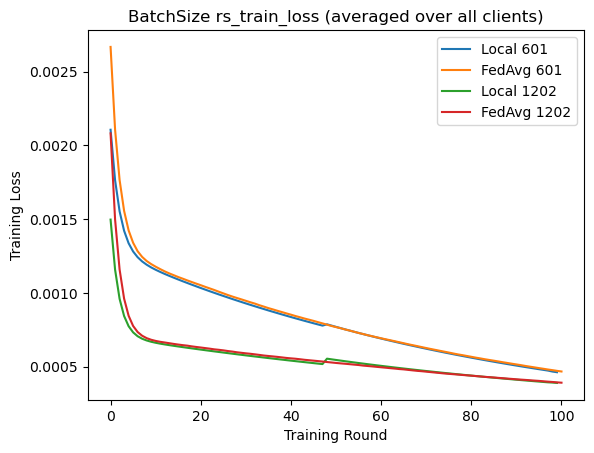

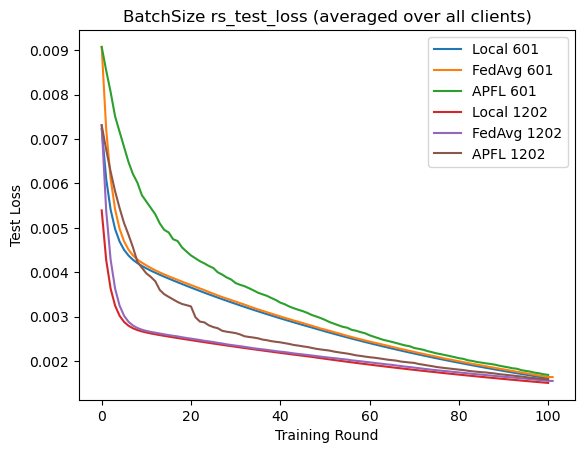

In [11]:
plt.plot(range(len(local_bs601_train_loss)), local_bs601_train_loss, label='Local 601')
plt.plot(range(len(fedavg_bs601_train_loss)), fedavg_bs601_train_loss, label='FedAvg 601')
#plt.plot(range(len(apfl_bs601_train_loss)), apfl_bs601_train_loss, label='APFL 601')
plt.plot(range(len(local_bs1202_train_loss)), local_bs1202_train_loss, label='Local 1202')
plt.plot(range(len(fedavg_bs1202_train_loss)), fedavg_bs1202_train_loss, label='FedAvg 1202')
#plt.plot(range(len(apfl_bs1202_train_loss)), apfl_bs1202_train_loss, label='APFL 1202')
plt.title("BatchSize rs_train_loss (averaged over all clients)")
plt.xlabel("Training Round")
plt.ylabel("Training Loss")
plt.legend()
plt.show()

plt.plot(range(len(local_bs601_test_loss)), local_bs601_test_loss, label='Local 601')
plt.plot(range(len(fedavg_bs601_test_loss)), fedavg_bs601_test_loss, label='FedAvg 601')
plt.plot(range(len(apfl_bs601_test_loss)), apfl_bs601_test_loss, label='APFL 601')
plt.plot(range(len(local_bs1202_test_loss)), local_bs1202_test_loss, label='Local 1202')
plt.plot(range(len(fedavg_bs1202_test_loss)), fedavg_bs1202_test_loss, label='FedAvg 1202')
plt.plot(range(len(apfl_bs1202_test_loss)), apfl_bs1202_test_loss, label='APFL 1202')
plt.title("BatchSize rs_test_loss (averaged over all clients)")
plt.xlabel("Training Round")
plt.ylabel("Test Loss")
plt.legend()
plt.show()

BS 1202 seems to learn quicker than BS 601, although 1202 were NOT with the same seed (they were pre-seed runs). Redo with seeded runs?
> Also, appears that everything is equal after about 100 rounds. It could be the case that 601 starts to beat the 1202, but if not, 1202 should remain the default since we want something that learns quickly. How will this work with the global init (eg will it keep these benefits)? Could also maybe start with a bs of 1202 but switch later (would behaviour get the best of both worlds?)

# Sept 5th Manual Grid Search
-gr 200
-lm_bias True
-lrt = 25
-stup = 10
-normalize_data = True
-test_split_fraction = 0.2
-test_split_each_update = False
-test_split_users = False
-bs = 1202 (AKA full update)
-localepochs = 3

In [1]:
import numpy as np
import h5py
import torch
import os
import matplotlib.pyplot as plt

In [9]:
sept5_base_folder = r"C:\Users\kdmen\Desktop\Research\personalization-privacy-risk\Personalized_Federated_Learning\results\Sept5_grid_search"
local_filename = "cphs_Local_test.h5"
fedavg_filename = "cphs_FedAvg_test.h5"

directories_lst = ["FedAvg_lDp00001_lEp000001_lr1",
                    "FedAvg_lDp00001_lEp000001_lrp0001",
                    "FedAvg_lDp00001_lEp000001_lrp01",
                    "FedAvg_lDp001_lEp0001_lr1",
                    "FedAvg_lDp001_lEp0001_lrp0001",
                    "FedAvg_lDp001_lEp0001_lrp01",
                    "Local_lDp00001_lEp000001_lr1",
                    "Local_lDp00001_lEp000001_lrp0001",
                    "Local_lDp00001_lEp000001_lrp01",
                    "Local_lDp001_lEp0001_lr1",
                    "Local_lDp001_lEp0001_lrp0001",
                    "Local_lDp001_lEp0001_lrp01"]
labels_lst = ["FedAvg_lD1e-5_lE1e-6_LR1",
                    "FedAvg_lD1e-5_lE1e-6_LRp0001",
                    "FedAvg_lD1e-5_lE1e-6_LRp01",
                    "FedAvg_lD1e-3_lE1e-4_LR1",
                    "FedAvg_lD1e-3_lE1e-4_LRp0001",
                    "FedAvg_lD1e-3_lE1e-4_LRp01",
                    "Local_lD1e-5_lE1e-6_LR1",
                    "Local_lD1e-5_lE1e-6_LRp0001",
                    "Local_lD1e-5_lE1e-6_LRp01",
                    "Local_lD1e-3_lE1e-4_LR1",
                    "Local_lD1e-3_lE1e-4_LRp0001",
                    "Local_lD1e-3_lE1e-4_LRp01"]
fedavg_linewidth = 1.5
local_linewidth = 0.5
lambdas_5_6_color = 'r'
lambdas_3_4_color = 'blue'
lr1_linestyle = "-"
lrp01_linestyle = "--"
lrp0001_linestyle = ":"
lps_lst = [(fedavg_linewidth, lambdas_5_6_color, lr1_linestyle),
              (fedavg_linewidth, lambdas_5_6_color, lrp0001_linestyle),
              (fedavg_linewidth, lambdas_5_6_color, lrp01_linestyle),
              (fedavg_linewidth, lambdas_3_4_color, lr1_linestyle),
              (fedavg_linewidth, lambdas_3_4_color, lrp0001_linestyle),
              (fedavg_linewidth, lambdas_3_4_color, lrp01_linestyle),
              (local_linewidth, lambdas_5_6_color, lr1_linestyle),
              (local_linewidth, lambdas_5_6_color, lrp0001_linestyle),
              (local_linewidth, lambdas_5_6_color, lrp01_linestyle),
              (local_linewidth, lambdas_3_4_color, lr1_linestyle),
              (local_linewidth, lambdas_3_4_color, lrp0001_linestyle),
              (local_linewidth, lambdas_3_4_color, lrp01_linestyle)]

train_loss_lst = [0]*len(directories_lst)
test_loss_lst = [0]*len(directories_lst)

for idx, directory_str in enumerate(directories_lst):
    my_filename = fedavg_filename if idx<6 else local_filename
    h5_path = os.path.join(sept5_base_folder, directory_str, my_filename)

    with h5py.File(h5_path, 'r') as f:
        a_group_key = list(f.keys())[0]
        train_loss_lst[idx] = f['rs_train_loss'][()]
        test_loss_lst[idx] = f['rs_test_loss'][()]

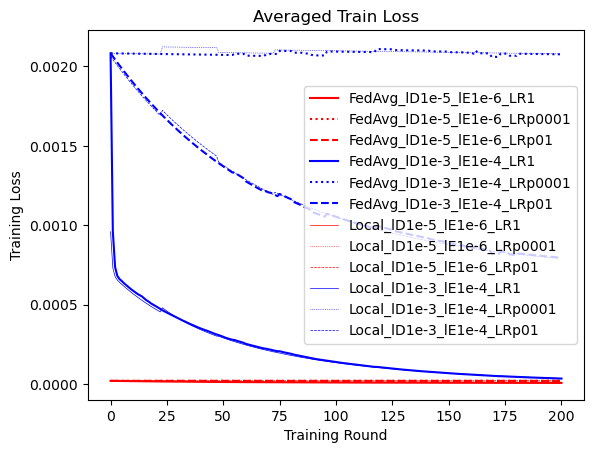

In [10]:
for idx in range(len(directories_lst)):
    plt.plot(range(len(train_loss_lst[idx])), train_loss_lst[idx], label=labels_lst[idx], linewidth=lps_lst[idx][0], color=lps_lst[idx][1], linestyle=lps_lst[idx][2])
plt.title("Averaged Train Loss")
plt.xlabel("Training Round")
plt.ylabel("Training Loss")
plt.legend()
plt.show()

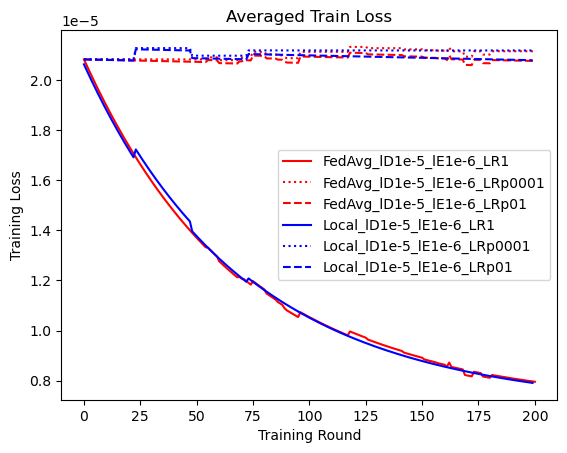

In [16]:
for idx in range(len(directories_lst)):
    if idx in [0,1,2]:
        plt.plot(range(len(train_loss_lst[idx])), train_loss_lst[idx], label=labels_lst[idx], color='r', linestyle=lps_lst[idx][2])
    elif idx in [6,7,8]:
        plt.plot(range(len(train_loss_lst[idx])), train_loss_lst[idx], label=labels_lst[idx], color='b', linestyle=lps_lst[idx][2])
plt.title("Averaged Train Loss")
plt.xlabel("Training Round")
plt.ylabel("Training Loss")
plt.legend()
plt.show()

In [ ]:
for idx in range(len(directories_lst)):
    if idx>5:
        pass
    else:
        plt.plot(range(len(train_loss_lst[idx])), train_loss_lst[idx], label=labels_lst[idx], linewidth=lps_lst[idx][0], color=lps_lst[idx][1], linestyle=lps_lst[idx][2])
plt.title("Averaged Train Loss")
plt.xlabel("Training Round")
plt.ylabel("Training Loss")
plt.legend()
plt.show()

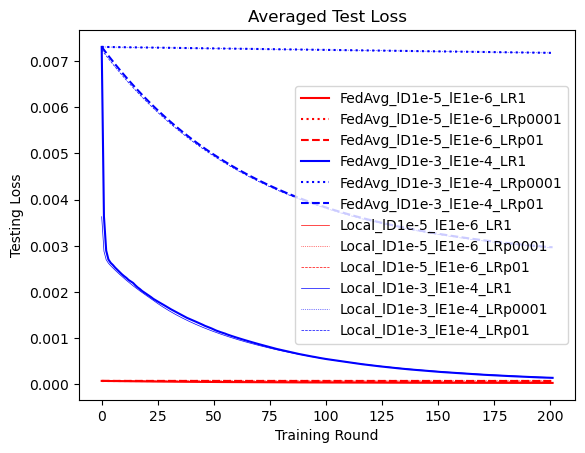

In [17]:
for idx in range(len(directories_lst)):
    plt.plot(range(len(test_loss_lst[idx])), test_loss_lst[idx], label=labels_lst[idx], linewidth=lps_lst[idx][0], color=lps_lst[idx][1], linestyle=lps_lst[idx][2])
plt.title("Averaged Test Loss")
plt.xlabel("Training Round")
plt.ylabel("Testing Loss")
plt.legend()
plt.show()

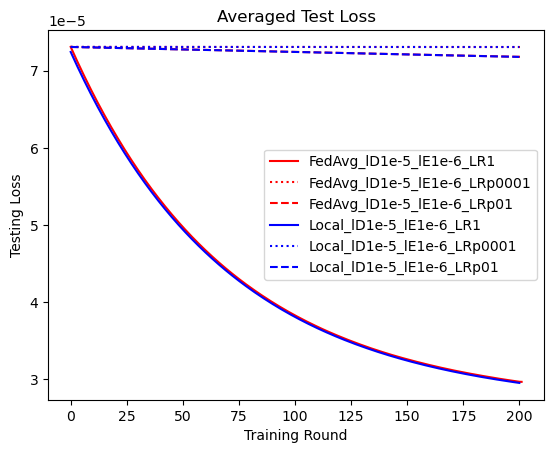

In [18]:
for idx in range(len(directories_lst)):
    if idx in [0,1,2]:
        plt.plot(range(len(test_loss_lst[idx])), test_loss_lst[idx], label=labels_lst[idx], color='r', linestyle=lps_lst[idx][2])
    elif idx in [6,7,8]:
        plt.plot(range(len(test_loss_lst[idx])), test_loss_lst[idx], label=labels_lst[idx], color='b', linestyle=lps_lst[idx][2])
plt.title("Averaged Test Loss")
plt.xlabel("Training Round")
plt.ylabel("Testing Loss")
plt.legend()
plt.show()

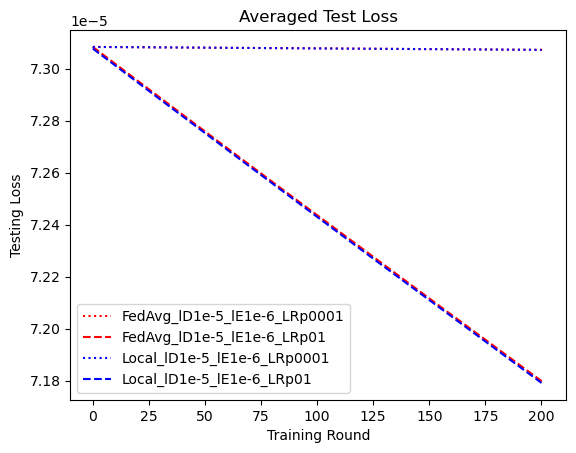

In [19]:
for idx in range(len(directories_lst)):
    if idx in [1,2]:
        plt.plot(range(len(test_loss_lst[idx])), test_loss_lst[idx], label=labels_lst[idx], color='r', linestyle=lps_lst[idx][2])
    elif idx in [7,8]:
        plt.plot(range(len(test_loss_lst[idx])), test_loss_lst[idx], label=labels_lst[idx], color='b', linestyle=lps_lst[idx][2])
plt.title("Averaged Test Loss")
plt.xlabel("Training Round")
plt.ylabel("Testing Loss")
plt.legend()
plt.show()

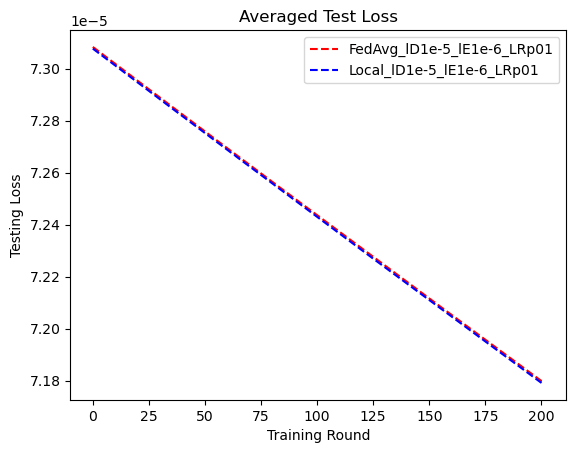

In [20]:
for idx in range(len(directories_lst)):
    if idx in [2]:
        plt.plot(range(len(test_loss_lst[idx])), test_loss_lst[idx], label=labels_lst[idx], color='r', linestyle=lps_lst[idx][2])
    elif idx in [8]:
        plt.plot(range(len(test_loss_lst[idx])), test_loss_lst[idx], label=labels_lst[idx], color='b', linestyle=lps_lst[idx][2])
plt.title("Averaged Test Loss")
plt.xlabel("Training Round")
plt.ylabel("Testing Loss")
plt.legend()
plt.show()

> __Conclusions__: 
- The biggest factor is clearly what the lambdas are set to, the lower lambda values I have been using correspond to a lower loss, which isn't that suprising (as they scale the loss...). Previuosly saw that higher lambdas (~1) diverged, but perhaps the learning rate needed to be lowered substantially? Perhaps low lambdas require high learning rates?
    - Determine whether the ratios of lambdas matter more, less, or the same as the magnitude of the lambdas... issue is dealing with model divergence
- Next, the LR being 1 results in a nice elbow plot, otherwise we were getting essentially linear error decreases much smaller in magnitude than LR1. I suspect this is related to the lambdas


In [3]:
general_results_path = r"C:\Users\kdmen\Desktop\Research\personalization-privacy-risk\Personalized_Federated_Learning\results"
fedavg_filename = "cphs_FedAvg_test.h5"
local_filename = "cphs_Local_test.h5"

# Directories
#"09-06_13-36_FedAvg200_LR10"
#"09-06_15-11_FedAvg200_LR10_LRDecayTrue"
# Labels
#"FedAvg_lD-5_lE-6_LR10"
#"FedAvg_lD-5_lE-6_LR10_LRDecay"

directory_str = "09-06_13-36_FedAvg200_LR10"
h5_path = os.path.join(general_results_path, directory_str, fedavg_filename)
with h5py.File(h5_path, 'r') as f:
    a_group_key = list(f.keys())[0]
    lr10_train_loss = f['rs_train_loss'][()]
    lr10_test_loss = f['rs_test_loss'][()]
    
directory_str = "09-06_15-11_FedAvg200_LR10_LRDecayTrue"
h5_path = os.path.join(general_results_path, directory_str, fedavg_filename)
with h5py.File(h5_path, 'r') as f:
    a_group_key = list(f.keys())[0]
    lr10_decay_train_loss = f['rs_train_loss'][()]
    lr10_decay_test_loss = f['rs_test_loss'][()]
    
# BASELINE COMPARISON
directory_str = "Sept5_grid_search\FedAvg_lDp00001_lEp000001_lr1"
h5_path = os.path.join(general_results_path, directory_str, fedavg_filename)
with h5py.File(h5_path, 'r') as f:
    a_group_key = list(f.keys())[0]
    fedavg_lr1_train_loss = f['rs_train_loss'][()]
    fedavg_lr1_test_loss = f['rs_test_loss'][()]
    
directory_str = "Sept5_grid_search\Local_lDp00001_lEp000001_lr1"
h5_path = os.path.join(general_results_path, directory_str, local_filename)
with h5py.File(h5_path, 'r') as f:
    a_group_key = list(f.keys())[0]
    local_lr1_train_loss = f['rs_train_loss'][()]
    local_lr1_test_loss = f['rs_test_loss'][()]

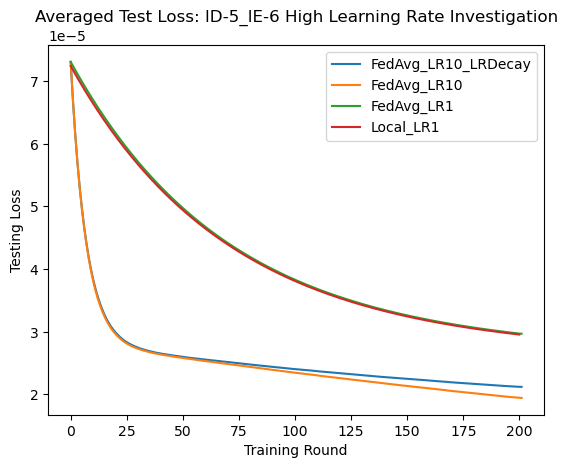

In [4]:
plt.plot(range(len(lr10_decay_test_loss)), lr10_decay_test_loss, label="FedAvg_LR10_LRDecay")
plt.plot(range(len(lr10_test_loss)), lr10_test_loss, label="FedAvg_LR10")
plt.plot(range(len(fedavg_lr1_test_loss)), fedavg_lr1_test_loss, label="FedAvg_LR1")
plt.plot(range(len(local_lr1_test_loss)), local_lr1_test_loss, label="Local_LR1")

plt.title("Averaged Test Loss: lD-5_lE-6 High Learning Rate Investigation")
plt.xlabel("Training Round")
plt.ylabel("Testing Loss")
plt.legend()
plt.show()

> Conclusions
- Higher learning rate is just better still...
- 